In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Users.csv')
df.head()

,Identifiant,Nom,Email,Âge,Ville,Sexe,Date d'inscription,Dernière connexion,Catégorie préférée,Appareil,produit acheté
0,1,Yacine Ait Ben Hadi,yacine.ait ben hadi@yahoo.fr,44,Khouribga,Homme,2021-06-23,2024-01-21 07:06:57.289253,Sport,ordinateur portable,Adidas Chaussure Court Blanc
1,2,Aicha Alaoui,aicha.alaoui@hotmail.com,49,El Jadida,Femme,2024-10-04,2024-01-30 17:11:07.984653,Électronique,téléphone,Console de Jeu Vidéo Rétro Portable
2,3,Reda Amine,reda.amine@hotmail.com,35,Khouribga,Homme,2021-03-02,2024-01-08 23:06:05.130763,Électronique,téléphone,Data Frog 4K HD Console de jeu vidéo 2.4G Doub...
3,4,Hassan El Ghazoui,hassan.el ghazoui@gmail.com,46,Meknès,Homme,2023-01-06,2024-08-14 18:58:10.814276,Électronique,téléphone,Data Frog Console de Jeu Vidéo Portable Rétro ...
4,5,Yacine Benyahia,yacine.benyahia@yahoo.fr,65,Meknès,Homme,2020-06-19,2024-05-15 23:25:19.345705,Électronique,ordinateur portable,"Console de jeu vidéo sans fil, écran HD 4K 64G..."


In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Identifiant         500 non-null    int64 
 1   Nom                 500 non-null    object
 2   Email               500 non-null    object
 3   Âge                 500 non-null    int64 
 4   Ville               500 non-null    object
 5   Sexe                500 non-null    object
 6   Date d'inscription  500 non-null    object
 7   Dernière connexion  500 non-null    object
 8   Catégorie préférée  500 non-null    object
 9   Appareil            500 non-null    object
 10  produit acheté      500 non-null    object
dtypes: int64(2), object(9)
memory usage: 43.1+ KB


In [5]:
print("Average Age:", df['Âge'].mean())
print("Median Age:", df['Âge'].median())
print("Age Standard Deviation:", df['Âge'].std())
print("Age Range:", df['Âge'].max() - df['Âge'].min())

Average Age: 44.064
Median Age: 44.0
Age Standard Deviation: 15.368287885938699
Age Range: 52


In [6]:
preferred_category_mode = df['Catégorie préférée'].mode()[0]
category_counts = df['Catégorie préférée'].value_counts()

print("Most Preferred Category:", preferred_category_mode)
print("Category Counts:\n", category_counts)

Most Preferred Category: Sport
Category Counts:
 Catégorie préférée
Sport           127
Électronique    122
Mode            101
Maison           97
Beauté           53
Name: count, dtype: int64


In [7]:
device_counts = df['Appareil'].value_counts()
device_percentages = df['Appareil'].value_counts(normalize=True) * 100

print("Device Counts:\n", device_counts)
print("Device Percentages (%):\n", device_percentages)

Device Counts:
 Appareil
téléphone              255
ordinateur portable    245
Name: count, dtype: int64
Device Percentages (%):
 Appareil
téléphone              51.0
ordinateur portable    49.0
Name: proportion, dtype: float64


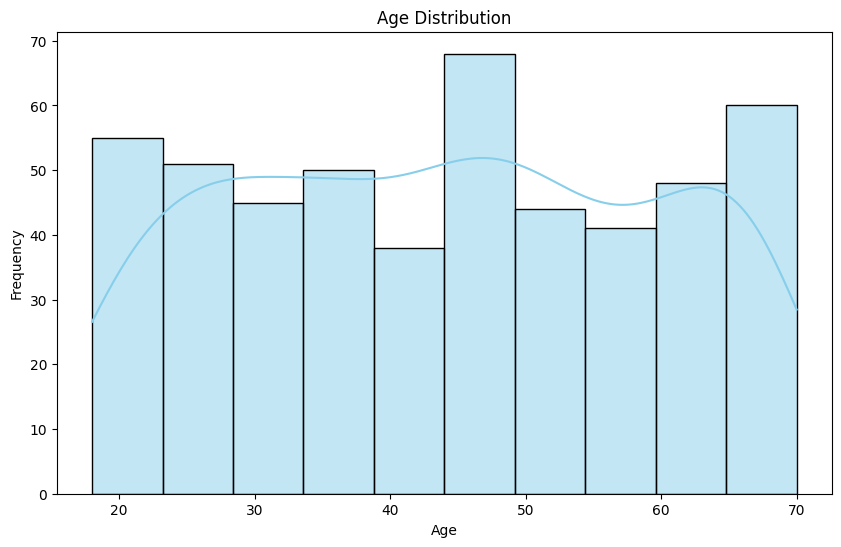

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Âge'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\ayabe\AppData\Local\Temp\ipykernel_11968\909678723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Catégorie préférée', data=df, palette='viridis')


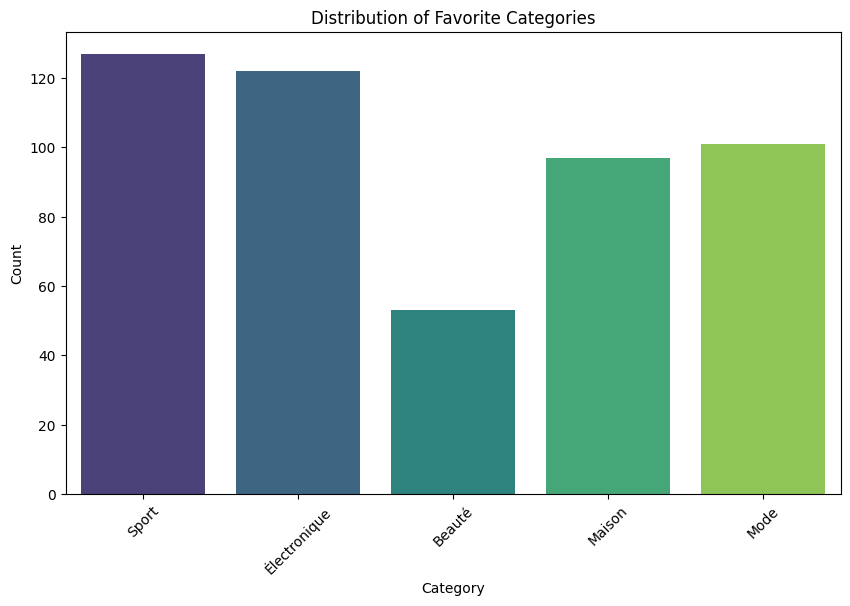

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Catégorie préférée', data=df, palette='viridis')
plt.title('Distribution of Favorite Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

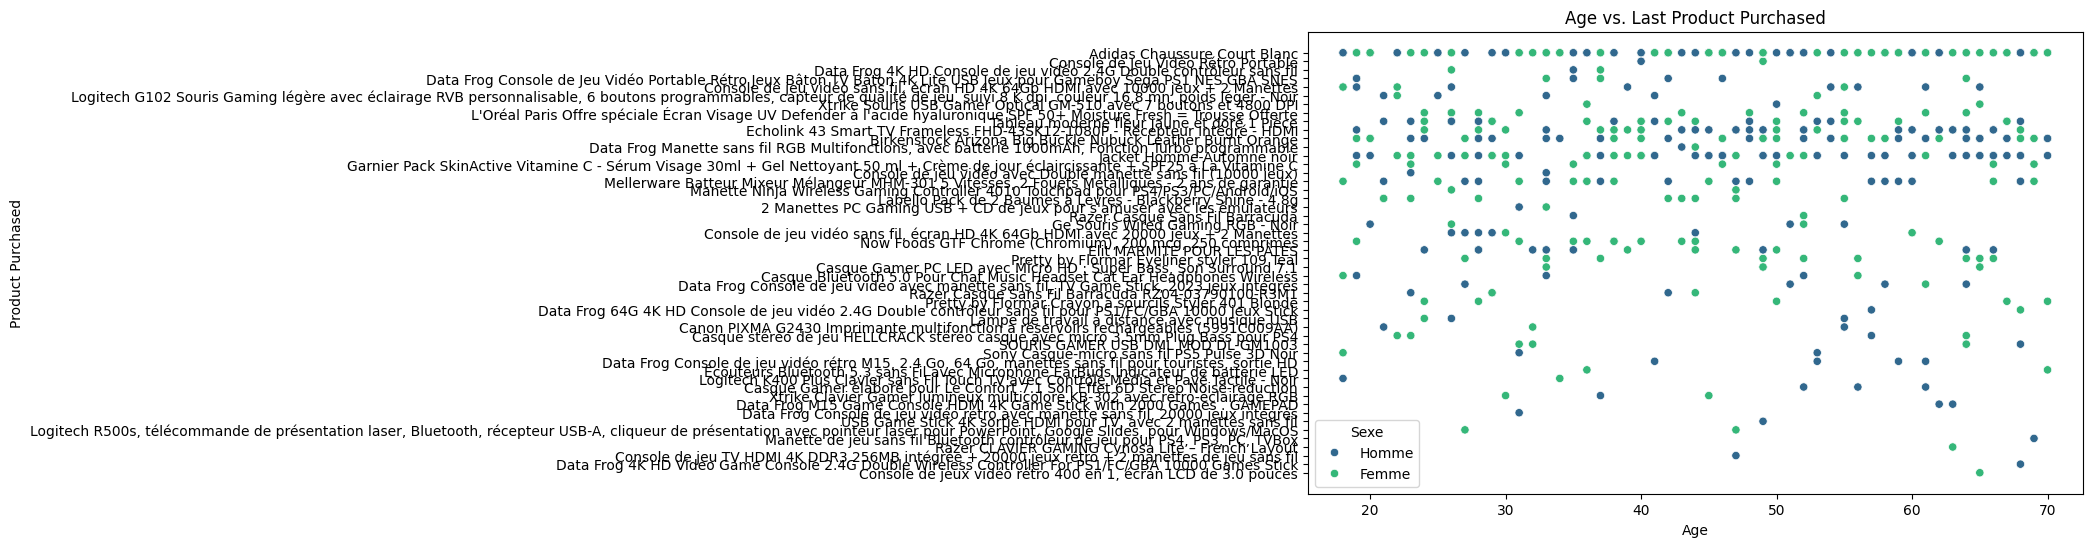

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Âge', y='produit acheté', data=df, hue='Sexe', palette='viridis')
plt.title('Age vs. Last Product Purchased')
plt.xlabel('Age')
plt.ylabel('Product Purchased')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [12]:
le = LabelEncoder()
df['Sexe'] = le.fit_transform(df['Sexe'])
df['Ville'] = le.fit_transform(df['Ville'])
df['Catégorie préférée'] = le.fit_transform(df['Catégorie préférée'])
df['Appareil'] = le.fit_transform(df['Appareil'])
df["Date d'inscription"] = le.fit_transform(df["Date d'inscription"])
df['Dernière connexion'] = le.fit_transform(df['Dernière connexion'])

In [13]:
X = df.drop(columns=['produit acheté','Nom', 'Email', 'Identifiant'])
y = df['produit acheté']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))

Logistic Regression - Accuracy: 0.26666666666666666
Logistic Regression - F1 Score: 0.14764157706093192


c:\Users\ayabe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

Decision Tree - Accuracy: 0.4666666666666667
Decision Tree - F1 Score: 0.4639520624303232


In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest - Accuracy: 0.5
Random Forest - F1 Score: 0.48398091664049114


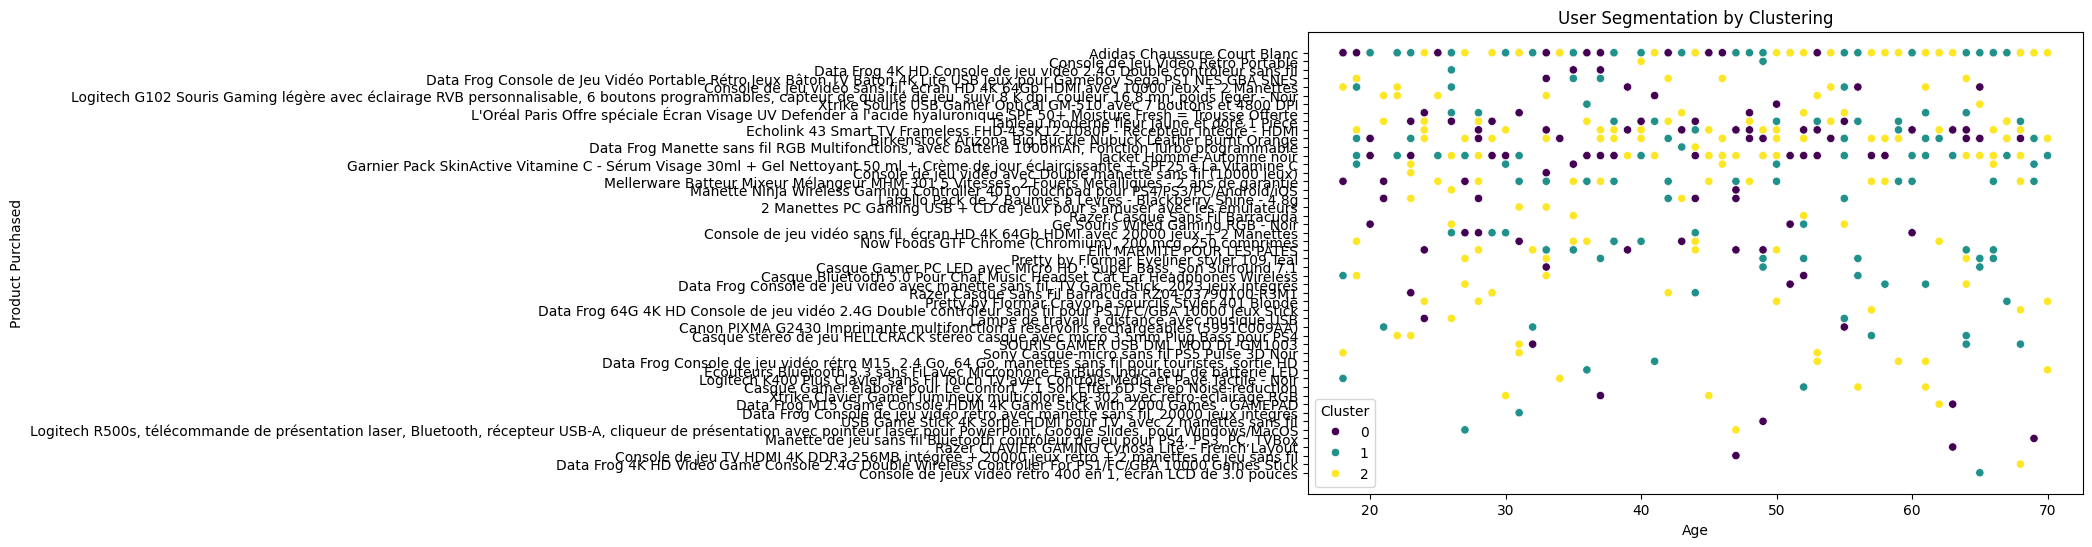

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Âge', y='produit acheté', hue='Cluster', data=df, palette='viridis')
plt.title('User Segmentation by Clustering')
plt.xlabel('Age')
plt.ylabel('Product Purchased')
plt.show()